# Testing of synthetic IRFs

Generation of a poisson noisy 2 life time component data with a gaussian IRF (sigma = 100 so that FWHM is around 300 ps).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from napari_flim_phasor_plotter import _synthetic as syn
import napari

In [2]:
def calculate_exp(x, A, tau):
    import numpy as np
    if np.isscalar(tau):
        tau = np.array([tau])
        A = np.array([A])
    return np.sum(A[:, None] * np.exp(-1/tau[:, None]*x), axis = 0)

In [5]:
laser_frequency = 40 # MHz
number_of_time_points = 30
small_time_array = syn.create_time_array(laser_frequency,number_of_time_points)

tau_1 = 0.7
tau_2 = 2
a1 = 0.6
two_amplitudes = np.array([a1, 1-a1])
tau_array = np.array([tau_1,tau_2])

In [6]:
normalized_counts = calculate_exp(small_time_array, two_amplitudes, tau_array)

In [7]:
maximum_photons = 2000
bg_counts = 40
sigma = 0.2 #ns
offset = 2

In [8]:
from scipy.stats import norm
from scipy import signal

In [9]:
syn_irf = norm.pdf(small_time_array, loc = offset, scale = sigma)


In [10]:
syn_irf = syn_irf/np.max(syn_irf) * maximum_photons

In [11]:
noisy_irf = syn_irf + bg_counts

In [119]:
#normalized_counts = np.zeros(small_time_array.shape)
#normalized_counts[small_time_array>offset] = calculate_exp(small_time_array[:np.sum(small_time_array>offset)], two_amplitudes, tau_array)
normalized_counts = calculate_exp(small_time_array, two_amplitudes, tau_array)

In [12]:
noisy_signal_counts = normalized_counts * maximum_photons + bg_counts

In [18]:
syn_irf = norm.pdf(small_time_array, loc = offset, scale = sigma)
syn_irf /= np.max(syn_irf)

In [35]:
corr = signal.convolve(noisy_irf, noisy_signal_counts, mode = "full", method = "direct")
corr

array([8.16000000e+04, 1.18892037e+05, 4.21883702e+06, 2.73443660e+06,
       1.48482097e+06, 9.46326130e+05, 6.78461659e+05, 5.28749101e+05,
       4.38603855e+05, 3.82156140e+05, 3.46228995e+05, 3.23314675e+05,
       3.08822285e+05, 2.99834342e+05, 2.94460668e+05, 2.91465263e+05,
       2.90036371e+05, 2.89639780e+05, 2.89923600e+05, 2.90655937e+05,
       2.91683944e+05, 2.92906864e+05, 2.94258278e+05, 2.95694400e+05,
       2.97186365e+05, 2.98715144e+05, 3.00268193e+05, 3.01837240e+05,
       3.03416835e+05, 3.05003383e+05, 2.23394396e+05, 1.86097089e+05,
       8.61418790e+04, 5.99262354e+04, 5.18718492e+04, 4.61626032e+04,
       4.18979397e+04, 3.85547615e+04, 3.58096853e+04, 3.34560506e+04,
       3.13596029e+04, 2.94324397e+04, 2.76167954e+04, 2.58746445e+04,
       2.41809362e+04, 2.25191608e+04, 2.08784362e+04, 1.92515891e+04,
       1.76338903e+04, 1.60222226e+04, 1.44145308e+04, 1.28094600e+04,
       1.12061172e+04, 9.60391345e+03, 8.00246065e+03, 6.40150291e+03,
      

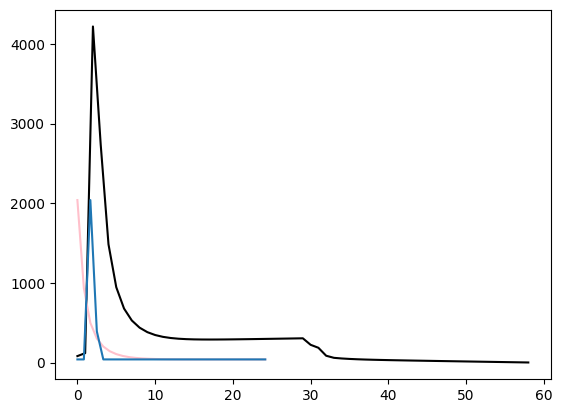

In [39]:
#plt.plot(small_time_array, syn_irf, color = "black")
#plt.plot(small_time_array[small_time_array>0], lognorm.pdf(small_time_array[small_time_array>0], sigma, offset), color = "r")

plt.plot(corr/1000, color = "black")
plt.plot(small_time_array, noisy_signal_counts, color = "pink")
plt.plot(small_time_array, noisy_irf)
plt.show()

Another approach

In [4]:
t_min = 0
t_max = 30
num_points = 10000

time = np.linspace(t_min, t_max, num_points)


In [9]:
normalized_counts = np.zeros(num_points)
normalized_counts[(time-5)>0] = calculate_exp(time[:len(time[(time-5)>0])], two_amplitudes, tau_array)
syn_irf = norm.pdf(time, loc = 5, scale = sigma)

In [10]:
noisy_signal_counts = normalized_counts + bg_counts
noisy_syn_irf = syn_irf/np.max(syn_irf) + bg_counts

In [196]:
normalized_noisy_signal_counts = noisy_signal_counts/np.trapz(noisy_signal_counts, time)
normalized_noisy_syn_irf = noisy_syn_irf/np.trapz(noisy_syn_irf, time)

In [12]:
convolved_signal = signal.convolve(noisy_signal_counts, noisy_syn_irf, mode = "same")/num_points

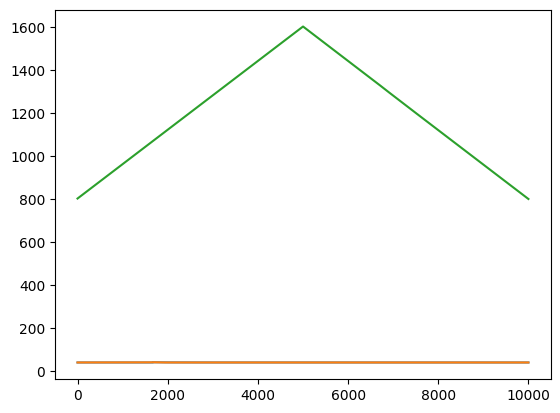

In [13]:
plt.plot(noisy_signal_counts, label='Gaussian Distribution')
plt.plot(noisy_syn_irf, label='Exponential Decay')
plt.plot(convolved_signal, label='Convolution with Noise')


In [18]:
np.stack([small_time_array,normalized_counts])[0].shape

(30,)